In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('./secret/Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())
])

param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5],
    'kmeans__init': ['k-means++', 'random']
    }

In [7]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)

In [8]:
grid_search.fit(df.iloc[:, [2,3,4]])
grid_search.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'kmeans__init': 'k-means++', 'kmeans__n_clusters': 5}

In [10]:
grid_search.best_estimator_.named_steps['kmeans'].labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 2, 4, 2, 4, 0, 4, 0, 4, 2, 4, 0, 4,
       2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 0,
       2, 4, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 3, 3, 0, 3, 1, 3, 2, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [12]:
grid_search.best_estimator_.named_steps['kmeans'].cluster_centers_

array([[-0.80051062, -0.41883481, -0.22719052],
       [ 0.13472565,  1.08669522, -1.29122864],
       [ 1.20282188, -0.44641412, -0.34728847],
       [-0.42880597,  0.97484722,  1.21608539],
       [-0.97439592, -1.32954532,  1.13217788]])

In [15]:
def plot_clusters(data, labels):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title("KMeans Clustering")
    plt.show()

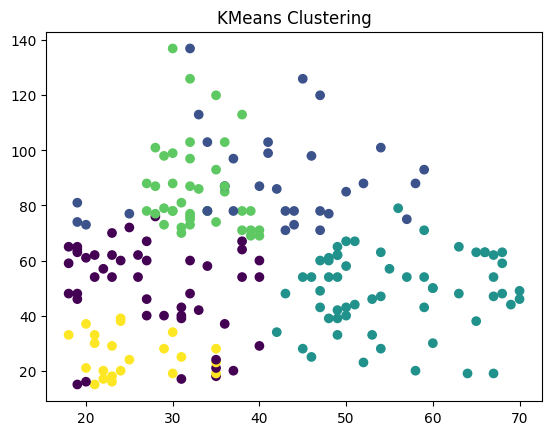

In [17]:
plot_clusters(df.iloc[:, [2,3]].values, grid_search.best_estimator_.named_steps['kmeans'].labels_)

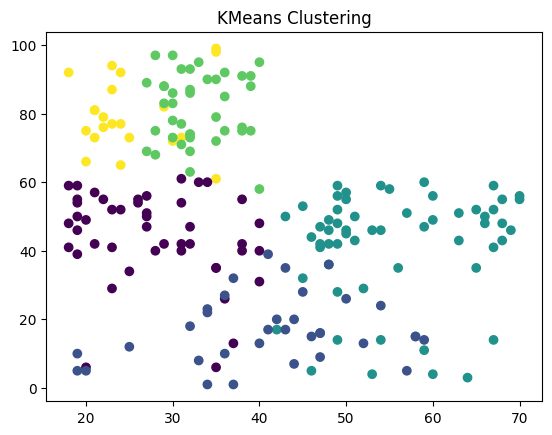

In [18]:
plot_clusters(df.iloc[:, [2,4]].values, grid_search.best_estimator_.named_steps['kmeans'].labels_)

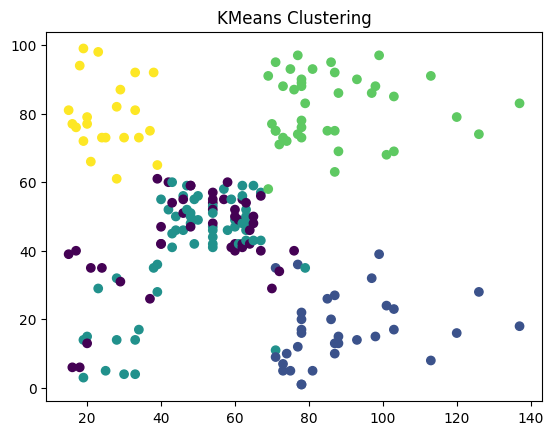

In [19]:
plot_clusters(df.iloc[:, [3,4]].values, grid_search.best_estimator_.named_steps['kmeans'].labels_)

In [20]:
grid_search.fit(df.iloc[:, [3,4]])
grid_search.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'kmeans__init': 'random', 'kmeans__n_clusters': 5}

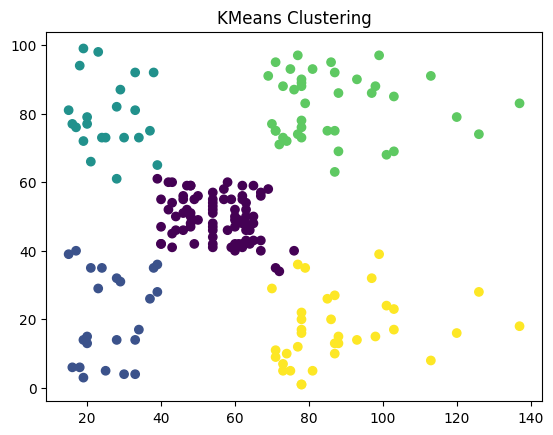

In [21]:
plot_clusters(df.iloc[:, [3,4]].values, grid_search.best_estimator_.named_steps['kmeans'].labels_)